In [1]:
from data_utils import load_binary_MNIST
from max_margin import fit_max_margin, evaluate_max_margin
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm

colors = ['black','#377eb8', '#ff7f00', '#4daf4a',
              '#984ea3', '#a65628', '#f781bf',
              '#999999', '#e41a1c', '#dede00']
markers = [ 'h', '*', '<', 'o', 's', 'v', 'D' ]

In [2]:
train_set, test_set = load_binary_MNIST()

In [5]:
num_datapoints = [50, 100, 200, 400, 800, 1600, 3200, 6400]
norms = []

for n_data in tqdm(num_datapoints):
    norms += [[]]
    i = 0
    mm_weights, mm_bias = None, None
    while(i < 5 or mm_weights is None):
        indices = np.random.choice(np.arange(train_set['labels'].shape[0]), n_data, replace=False)
        
        with torch.no_grad():
            W = torch.randn((50000, 28*28))
            x, y = train_set['images'][indices], train_set['labels'][indices]
            x = x.view(len(indices), -1)
            x = F.relu(x @ W.T)

        mm_weights, mm_bias = fit_max_margin(x, y, verbose=False)

        if mm_weights is not None:
            i += 1
            print(i, end='\r')
            norms[-1] += [np.linalg.norm(mm_weights)]
        else:
            print("Problem is infeasible with %d samples - resampling train set." % n_data)
        
ys = [np.mean(y) for y in norms]
yerrs = [np.std(y) for y in norms] # Error bars

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:23<02:42, 23.16s/it]

 25%|██▌       | 2/8 [01:06<03:30, 35.17s/it]

 38%|███▊      | 3/8 [02:30<04:47, 57.43s/it]

 50%|█████     | 4/8 [05:39<07:16, 109.19s/it]

 62%|██████▎   | 5/8 [12:50<11:16, 225.48s/it]

 75%|███████▌  | 6/8 [27:56<15:13, 456.73s/it]

 88%|████████▊ | 7/8 [1:06:56<17:52, 1072.50s/it]

100%|██████████| 8/8 [2:27:40<00:00, 1107.59s/it]

<Figure size 360x360 with 0 Axes>

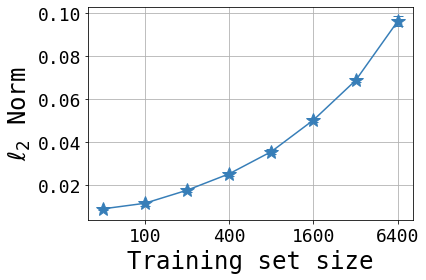

In [6]:
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rcParams['font.family'] ='monospace'
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
ax.set_xlabel('Training set size',fontsize=24)
ax.set_ylabel(r'$\ell_2$ Norm',fontsize=24)
ax.errorbar(x=np.log(num_datapoints),y=ys,yerr= yerrs,marker=markers[1], color=colors[1], 
            capsize=5,markersize=15)
ax.grid()
plt.tight_layout()
plt.xticks(np.log([100, 400, 1600, 6400]), ['100','400','1600','6400'])
plt.savefig(f'plots/mnist_increasing_norms.pdf')

In [9]:
np.save('results/mnist_increasing_norms.npy', np.array(norms))